## Importation des librairies utiles aux analyses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***vérification des versions***

In [2]:
from platform import python_version

print('Python version', python_version())
print('Pandas version', pd.__version__)

Python version 3.9.7
Pandas version 1.3.4


In [3]:
!pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.4
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.

In [4]:
pip show matplotlib

Name: matplotlib
Version: 3.4.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\laure\anaconda3\lib\site-packages
Requires: python-dateutil, pillow, cycler, numpy, kiwisolver, pyparsing
Required-by: seaborn, scikit-image, missingno
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pwd

'C:\\Users\\laure\\OneDrive\\Documents\\Formation\\OpenClassrooms\\Parcours Data Scientist\\Projet 2 Analysez des données de systèmes éducatifs\\Mission'

## Chargement des fichiers sous forme de dataframe

In [6]:
statsData = pd.read_csv("EdStatsData.csv")

In [7]:
statsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Il y a {} lignes et {} colonnes".format(statsData.shape[0], statsData.shape[1]))

Il y a 886930 lignes et 70 colonnes


ce dataframe "statsData" servira de base de travail pour réaliser les analyses demandées

In [9]:
statsCountry = pd.read_csv("EdStatsCountry.csv")

In [10]:
statsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [11]:
print("Il y a {} lignes et {} colonnes".format(statsCountry.shape[0], statsCountry.shape[1]))

Il y a 241 lignes et 32 colonnes


Ce fichier contient des éléments de codification qui auraient pu être utiles mais il ne devrait pas être utilisé pour les analyses demandées car ces données sont aussi présentes dans le fichier "StatsData" qui servira de base de travail

In [12]:
statsCountrySeries = pd.read_csv("EdStatsCountry-Series.csv")

In [13]:
statsCountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [14]:
print("Il y a {} lignes et {} colonnes".format(statsCountrySeries.shape[0], statsCountrySeries.shape[1]))

Il y a 613 lignes et 4 colonnes


Ce fichier ne devrait pas être utilisé pour les analyses compte tenu des données présentes

In [15]:
statsSeries = pd.read_csv("EdStatsSeries.csv")

In [16]:
statsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print("Il y a {} lignes et {} colonnes".format(statsSeries.shape[0], statsSeries.shape[1]))

Il y a 3665 lignes et 21 colonnes


Ce fichier donne des précisions sur les indicateurs (descriptif) mais ne devrait pas être utilisé pour les analyses compte tenu des données présentes

In [18]:
statsFootNote = pd.read_csv("EdStatsFootNote.csv")

In [19]:
statsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [20]:
print("Il y a {} lignes et {} colonnes".format(statsFootNote.shape[0], statsFootNote.shape[1]))

Il y a 643638 lignes et 5 colonnes


Ce fichier ne devrait pas être utilisé pour les analyses compte tenu des données présentes

### Tableau de synthèse (lignes, colonnes)

In [21]:
shape = np.array([[statsData.shape[0], statsCountry.shape[0], statsCountrySeries.shape[0], statsSeries.shape[0], statsFootNote.shape[0]],
                  [statsData.shape[1], statsCountry.shape[1], statsCountrySeries.shape[1], statsSeries.shape[1], statsFootNote.shape[1]]])
shapeTab = pd.DataFrame(shape, index = ['lignes', 'colonnes'], columns = ['Data', 'Country', 'CountrySeries', 'Series', 'FootNote'])
print(shapeTab)

            Data  Country  CountrySeries  Series  FootNote
lignes    886930      241            613    3665    643638
colonnes      70       32              4      21         5


In [22]:
shapeTab.to_excel("tabSyntShape.xlsx")

## Contrôle du type de données

In [23]:
pd.options.display.max_rows = None #pour afficher l'intégralité des lignes (sinon limite par défaut)
display(statsData.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004        

On a bien l'intégralité des colonnes 

Les valeurs correspondant aux valeurs des indicateurs sont toutes des "float64'", ce qui est cohérent 

Pas d'anomalies identifiées suite à cette analyse

## Recherche de doublons par type d'indicateurs et pays

In [24]:
statsData.loc[statsData[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']].duplicated(keep=False),:]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


pas de doublons identifiés

## Visualisation du taux de remplissage des données

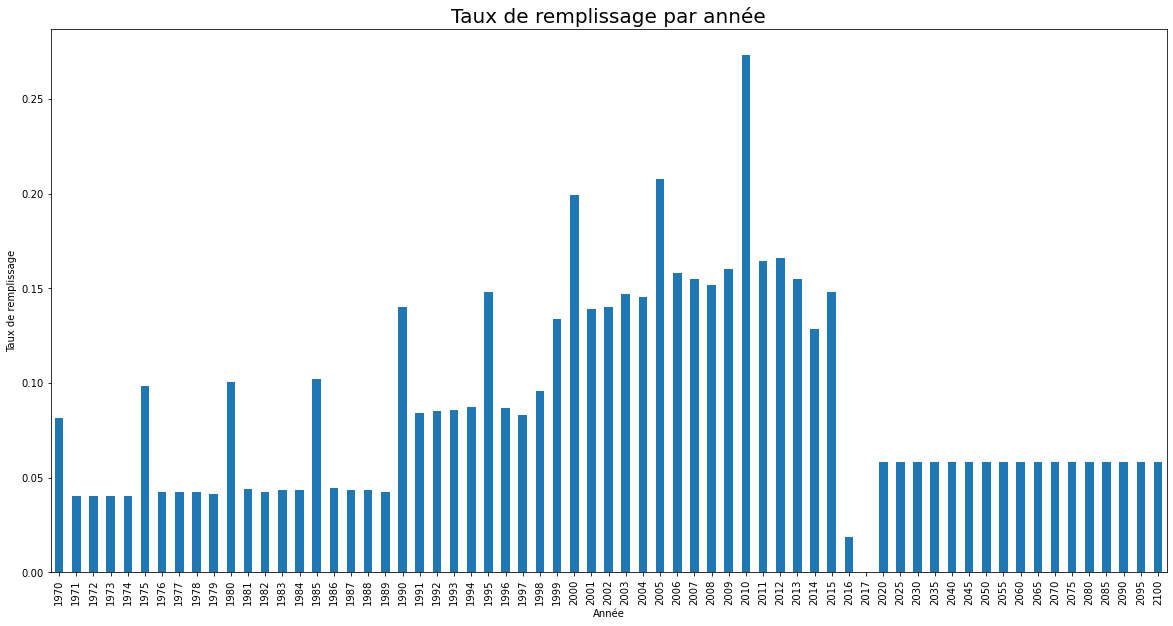

In [25]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes()
taux_remplissage = statsData.notnull().mean()
taux_remplissage[4:69].plot.bar()
plt.title("Taux de remplissage par année",fontsize = 20)
ax = ax.set(xlabel='Année', ylabel='Taux de remplissage')
plt.savefig('taux.png')

<AxesSubplot:ylabel='Density'>

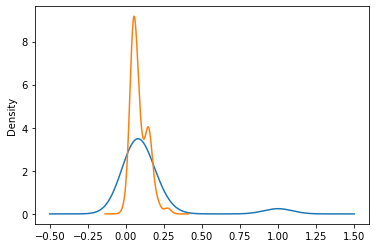

In [26]:
taux_remplissage.plot.kde()
taux_remplissage[4:69].plot.kde()

In [27]:
taux_remplissage[4:69].mean()

0.0881554437129286

In [28]:
taux_remplissage[4:69].std()

0.05359898426408361

In [29]:
taux_remplissage[34:50].mean()

0.16488251609484406

In [30]:
taux_remplissage[34:50].std()

0.03542428105898251

Globalement, on voit que les taux de remplissage sont relativement bas, ce qui nécessitera une analyse plus approfondie pour déterminer les indicateurs les plus pertinents.

On peut remarquer à vue d'oeil une périodicité de 5 ans sur certains indicateurs depuis les années 1970 ainsi que globalement un niveau d'informations inférieur avant les années 90. La dernière année la plus exploitable semble être 2015.

Les années 2020 à 2100 correspondant à un indicateur prospectif, celles-ci ne seront pas intégrées dans nos analyses ainsi que l'année 2017.

Elimination des colonnes non jugées pertinentes

In [31]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [32]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

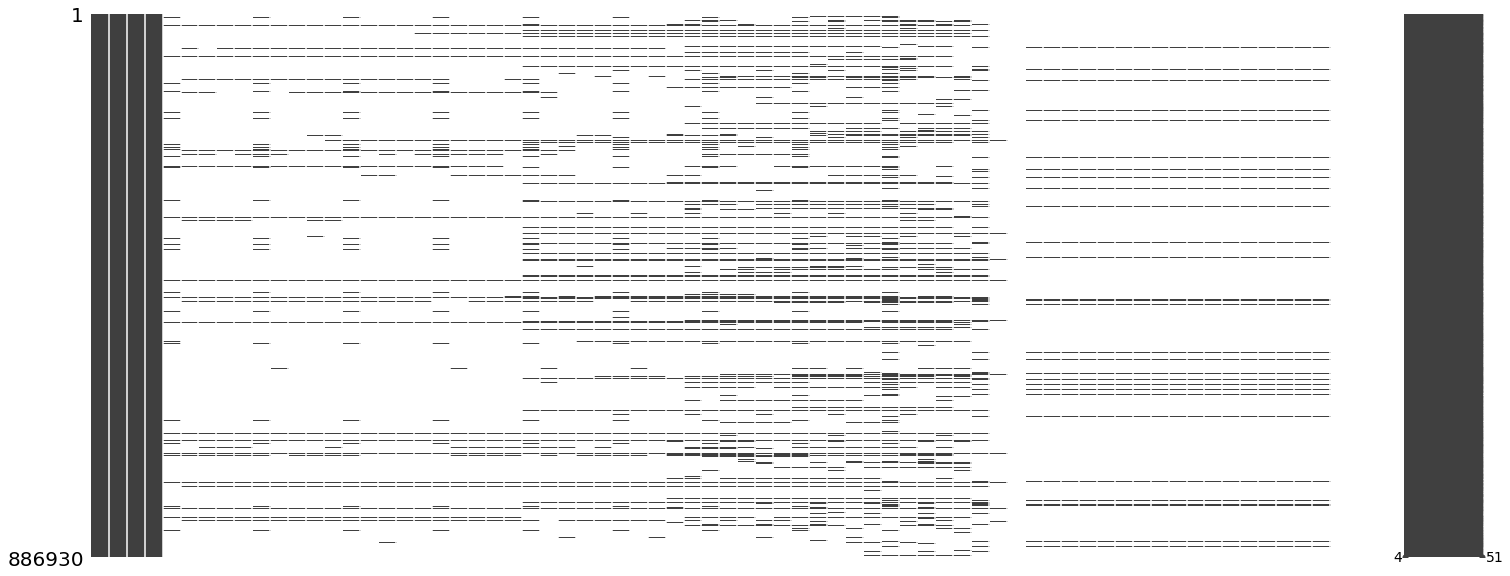

In [33]:
msno.matrix(statsData.sample(len(statsData)))

L'utilisation du package Missngno confirme l'analyse faite précédemment

In [34]:
statsDataSelection = statsData.drop(['Country Code', 'Indicator Code', '1970', '1971', '1972','1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69'], axis=1)

In [35]:
statsDataSelection.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,"Adjusted net enrolment rate, primary, both sex...",77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN


Les colonnes non utilisées ont bien été retirées du tableau de données

## Recherche des zones, pays...

In [36]:
pd.unique(statsDataSelection['Country Name'])

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


On remarque ainsi que jusqu'à l'Afghanistan, il n'y a que des zones de regroupement (géographique, revenus, zone monétaire...), on les séparera du reste des pays

In [37]:
statsDataSelection = statsDataSelection.set_index(['Country Name'])

In [38]:
statsDataSelectionPays = statsDataSelection.drop(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World'], axis=0)
statsDataSelectionPays.head()

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.223100,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379130,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.152851,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,NaN
Afghanistan,"Adjusted net enrolment rate, primary, both sex...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Les données liées aux zones (géo, revenus, etc...) ont bien été supprimées

Pour rendre l'analyse plus pertinente et faciliter l'exploitation des données, nous allons déterminer un critère éliminatoire, à savoir une population totale inférieure à 5 millions d'habitants

In [39]:
Population_Total = statsDataSelectionPays.loc[statsDataSelectionPays['Indicator Name'] == 'Population, total']
PopTot = Population_Total.iloc[:,[0,16]].sort_values(by=['2015'])
PopTot

,Indicator Name,2015
Country Name,,
Tuvalu,"Population, total",1.100100e+04
Palau,"Population, total",2.128800e+04
San Marino,"Population, total",3.296000e+04
Gibraltar,"Population, total",3.422800e+04
Turks and Caicos Islands,"Population, total",3.433900e+04
Liechtenstein,"Population, total",3.740300e+04
Monaco,"Population, total",3.830700e+04
Faroe Islands,"Population, total",4.896500e+04
Marshall Islands,"Population, total",5.299400e+04


In [40]:
PopTotInf5m = PopTot[PopTot['2015'] < 5000000]
PopTotInf5m.head()

,Indicator Name,2015
Country Name,,
Tuvalu,"Population, total",11001.0
Palau,"Population, total",21288.0
San Marino,"Population, total",32960.0
Gibraltar,"Population, total",34228.0
Turks and Caicos Islands,"Population, total",34339.0


In [41]:
PopTotInf5m = PopTotInf5m.reset_index()
pd.unique(PopTotInf5m['Country Name'])

array(['Tuvalu', 'Palau', 'San Marino', 'Gibraltar',
       'Turks and Caicos Islands', 'Liechtenstein', 'Monaco',
       'Faroe Islands', 'Marshall Islands', 'St. Kitts and Nevis',
       'Northern Mariana Islands', 'American Samoa', 'Greenland',
       'Cayman Islands', 'Bermuda', 'Dominica', 'Andorra', 'Isle of Man',
       'Seychelles', 'Antigua and Barbuda', 'Virgin Islands (U.S.)',
       'Aruba', 'Micronesia, Fed. Sts.', 'Tonga', 'Grenada',
       'St. Vincent and the Grenadines', 'Kiribati', 'Guam',
       'Channel Islands', 'St. Lucia', 'Samoa', 'Sao Tome and Principe',
       'Vanuatu', 'New Caledonia', 'French Polynesia', 'Barbados',
       'Iceland', 'Belize', 'Bahamas, The', 'Maldives',
       'Brunei Darussalam', 'Malta', 'Cabo Verde', 'Suriname',
       'Luxembourg', 'Solomon Islands', 'Macao SAR, China', 'Montenegro',
       'Guyana', 'Comoros', 'Bhutan', 'Fiji', 'Djibouti', 'Cyprus',
       'Equatorial Guinea', 'Timor-Leste', 'Mauritius', 'Estonia',
       'Swaziland',

In [42]:
len(PopTotInf5m)

94

In [43]:
statsDataSelectionPaysInf5m = statsDataSelectionPays.drop(pd.unique(PopTotInf5m['Country Name']), axis=0)
statsDataSelectionPaysInf5m.head()

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.223100,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379130,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.152851,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,NaN
Afghanistan,"Adjusted net enrolment rate, primary, both sex...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
statsDataSelectionPaysInf5m.tail()

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Zimbabwe,"Youth illiterate population, 15-24 years, male...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.00000,NaN,NaN
Zimbabwe,"Youth literacy rate, population 15-24 years, b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.42812,NaN,NaN
Zimbabwe,"Youth literacy rate, population 15-24 years, f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.18835,NaN,NaN
Zimbabwe,"Youth literacy rate, population 15-24 years, g...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.06389,NaN,NaN
Zimbabwe,"Youth literacy rate, population 15-24 years, m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.59058,NaN,NaN,87.59186,NaN,NaN


In [45]:
statsDataSelectionPaysInf5m['Indicator Name'].nunique()

3665

In [46]:
statsDataSelectionPaysInf5m2015 = statsDataSelectionPaysInf5m.drop(['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2016'], axis=1)

In [47]:
statsDataSelectionPaysInf5m2015.head()

,Indicator Name,2015
Country Name,,
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN
Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",NaN
Afghanistan,"Adjusted net enrolment rate, primary, both sex...",NaN


In [48]:
statsDataSelectionPaysInf5m2015 = statsDataSelectionPaysInf5m2015.reset_index()

In [49]:
statsDataSelectionPaysInf5m2015.groupby(by=["Indicator Name"]).count().sort_values(by=['2015'], ascending=False)

,Country Name,2015
Indicator Name,,
Official entrance age to lower secondary education (years),123,122
Official entrance age to primary education (years),123,122
Theoretical duration of upper secondary education (years),123,122
Theoretical duration of secondary education (years),123,122
Theoretical duration of primary education (years),123,122
Theoretical duration of pre-primary education (years),123,122
Theoretical duration of lower secondary education (years),123,122
"Population of the official age for secondary education, both sexes (number)",123,119
Official entrance age to pre-primary education (years),123,119


In [50]:
statsDataSelectionPaysInf5m2010 = statsDataSelectionPaysInf5m.drop(['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014', '2015', '2016'], axis=1)

In [51]:
statsDataSelectionPaysInf5m2010 = statsDataSelectionPaysInf5m2010.reset_index()

In [52]:
statsDataSelectionPaysInf5m2010 = statsDataSelectionPaysInf5m2010.groupby(by=["Indicator Name"]).count().sort_values(by=['2010'], ascending=False)

In [53]:
statsDataSelectionPaysInf5m2010['tauxderemplissageIndic'] = statsDataSelectionPaysInf5m2010['2010']/statsDataSelectionPaysInf5m2010['Country Name']

In [54]:
statsDataSelectionPaysInf5m2010 = statsDataSelectionPaysInf5m2010[statsDataSelectionPaysInf5m2010['tauxderemplissageIndic'] >0.5]
statsDataSelectionPaysInf5m2010

,Country Name,2010,tauxderemplissageIndic
Indicator Name,,,
Theoretical duration of primary education (years),123,122,0.991870
Theoretical duration of upper secondary education (years),123,122,0.991870
Official entrance age to lower secondary education (years),123,122,0.991870
Theoretical duration of lower secondary education (years),123,122,0.991870
Theoretical duration of pre-primary education (years),123,122,0.991870
Theoretical duration of secondary education (years),123,122,0.991870
Official entrance age to primary education (years),123,122,0.991870
Population growth (annual %),123,121,0.983740
"Population, total",123,121,0.983740


In [55]:
statsDataSelectionPaysInf5m2010 = statsDataSelectionPaysInf5m2010.reset_index()

In [56]:
statsDataSelectionPaysInf5m2010['Indicator Name'].nunique()

1326

cela permet de réduire la masse d'indicateurs de 3665 à 1326

## Sélection des indicateurs suivants :

### 3 catégories :

**Economie** : GDP per capita (current US$), Government expenditure on education as % of GDP (%), Internet users (per 100 people) => 3 indicateurs (les autres sont redondants)

**Démographie** : Population, total; Gross enrolment ratio, primary, both sexes (%) (idem pour secondary and tertiary) 

**Emploi** : Labor force, total ; Unemployment, total (% of total labor force) => pour une offre de formation professionnelle par exemple (continue)

In [57]:
indicSelec = ['Population, total', 'Gross enrolment ratio, primary, both sexes (%)', 'Gross enrolment ratio, secondary, both sexes (%)', 'Gross enrolment ratio, tertiary, both sexes (%)', 'GDP per capita (current US$)', 'Government expenditure on education as % of GDP (%)', 'Internet users (per 100 people)', 'Labor force, total', 'Unemployment, total (% of total labor force)' ]

In [58]:
tabSynthèseRempIndic = statsDataSelectionPaysInf5m2010[statsDataSelectionPaysInf5m2010['Indicator Name'].isin(indicSelec)]
tabSynthèseRempIndic

,Indicator Name,Country Name,2010,tauxderemplissageIndic
8,"Population, total",123,121,0.983740
30,"Unemployment, total (% of total labor force)",123,117,0.951220
33,"Labor force, total",123,117,0.951220
85,Internet users (per 100 people),123,116,0.943089
233,GDP per capita (current US$),123,115,0.934959
927,"Gross enrolment ratio, primary, both sexes (%)",123,100,0.813008
991,"Gross enrolment ratio, secondary, both sexes (%)",123,90,0.731707
1032,"Gross enrolment ratio, tertiary, both sexes (%)",123,86,0.699187
1058,Government expenditure on education as % of GD...,123,83,0.674797


In [59]:
tabSynthèseRempIndic = tabSynthèseRempIndic.set_index(['Indicator Name'])
tabSynthèseRempIndic = tabSynthèseRempIndic.rename(columns={'Country Name' : 'nb total de pays'})
tabSynthèseRempIndic = tabSynthèseRempIndic.rename(columns={'2010' : 'nb de pays rempli'})
tabSynthèseRempIndic = tabSynthèseRempIndic.rename(columns={'tauxderemplissageIndic' : 'taux de remplissage'})
tabSynthèseRempIndic

,nb total de pays,nb de pays rempli,taux de remplissage
Indicator Name,,,
"Population, total",123,121,0.983740
"Unemployment, total (% of total labor force)",123,117,0.951220
"Labor force, total",123,117,0.951220
Internet users (per 100 people),123,116,0.943089
GDP per capita (current US$),123,115,0.934959
"Gross enrolment ratio, primary, both sexes (%)",123,100,0.813008
"Gross enrolment ratio, secondary, both sexes (%)",123,90,0.731707
"Gross enrolment ratio, tertiary, both sexes (%)",123,86,0.699187
Government expenditure on education as % of GDP (%),123,83,0.674797


In [60]:
tabSynthèseRempIndic.to_excel("tabSynthèseRempIndic.xlsx")

Même si les taux de remplissage sont moins élevés pour les 4 derniers indicateurs, il reste intéressant de les conserver pour avoir une analyse plus fine du marché potentiel

## Indicateurs Démographie

### Indicateur Population Total

In [61]:
Population_Total = statsDataSelectionPaysInf5m.loc[statsDataSelectionPaysInf5m['Indicator Name'] == 'Population, total']
Population_Total

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,"Population, total",2.009376e+07,2.096646e+07,2.197992e+07,2.306485e+07,2.411898e+07,2.507080e+07,2.589345e+07,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07
Algeria,"Population, total",3.118366e+07,3.159215e+07,3.199505e+07,3.240351e+07,3.283110e+07,3.328844e+07,3.377792e+07,3.430008e+07,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07
Angola,"Population, total",1.644092e+07,1.698327e+07,1.757265e+07,1.820337e+07,1.886572e+07,1.955254e+07,2.026240e+07,2.099769e+07,2.175942e+07,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07
Argentina,"Population, total",3.705745e+07,3.747151e+07,3.788937e+07,3.830938e+07,3.872870e+07,3.914549e+07,3.955889e+07,3.997022e+07,4.038239e+07,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07
Australia,"Population, total",1.915300e+07,1.941300e+07,1.965140e+07,1.989540e+07,2.012740e+07,2.039480e+07,2.069790e+07,2.082760e+07,2.124920e+07,2.169170e+07,2.203175e+07,2.234002e+07,2.272825e+07,2.311735e+07,2.346069e+07,2.378934e+07,2.412716e+07
Austria,"Population, total",8.011566e+06,8.042293e+06,8.081957e+06,8.121423e+06,8.171966e+06,8.227829e+06,8.268641e+06,8.295487e+06,8.321496e+06,8.343323e+06,8.363404e+06,8.391643e+06,8.429991e+06,8.479375e+06,8.541575e+06,8.633169e+06,8.747358e+06
Azerbaijan,"Population, total",8.048600e+06,8.111200e+06,8.171950e+06,8.234100e+06,8.306500e+06,8.391850e+06,8.484550e+06,8.581300e+06,8.763400e+06,8.947243e+06,9.054332e+06,9.173082e+06,9.295784e+06,9.416801e+06,9.535079e+06,9.649341e+06,9.762274e+06
Bangladesh,"Population, total",1.315812e+08,1.341072e+08,1.366007e+08,1.390190e+08,1.413075e+08,1.434311e+08,1.453680e+08,1.471392e+08,1.488058e+08,1.504547e+08,1.521491e+08,1.539119e+08,1.557271e+08,1.575713e+08,1.594053e+08,1.612009e+08,1.629516e+08
Belarus,"Population, total",9.979610e+06,9.928549e+06,9.865548e+06,9.796749e+06,9.730146e+06,9.663915e+06,9.604924e+06,9.560953e+06,9.527985e+06,9.506765e+06,9.490583e+06,9.473172e+06,9.464495e+06,9.465997e+06,9.474511e+06,9.489616e+06,9.507120e+06


In [62]:
Population_Total = Population_Total.dropna()

In [63]:
Population_Total.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02
mean,5.151530e+07,5.218680e+07,5.285513e+07,5.352584e+07,5.420168e+07,5.488137e+07,5.556552e+07,5.625354e+07,5.695242e+07,5.765263e+07,5.835315e+07,5.904438e+07,5.975426e+07,6.047165e+07,6.119508e+07,6.191882e+07,6.264798e+07
std,1.542719e+08,1.560351e+08,1.577503e+08,1.594235e+08,1.610741e+08,1.627194e+08,1.643405e+08,1.659286e+08,1.675004e+08,1.690436e+08,1.705575e+08,1.720432e+08,1.735212e+08,1.749905e+08,1.764664e+08,1.779421e+08,1.794452e+08
min,3.154925e+06,3.326032e+06,3.507232e+06,3.701464e+06,3.863267e+06,3.986852e+06,4.057350e+06,4.086466e+06,4.111047e+06,4.183156e+06,4.337141e+06,4.588368e+06,4.916404e+06,5.079623e+06,5.137232e+06,5.188607e+06,5.232929e+06
25%,8.139779e+06,8.274854e+06,8.445141e+06,8.568784e+06,8.690454e+06,8.841764e+06,8.931516e+06,9.006394e+06,9.105578e+06,9.210697e+06,9.333409e+06,9.457905e+06,9.505654e+06,9.600331e+06,9.823878e+06,9.832068e+06,9.881831e+06
50%,1.552052e+07,1.585905e+07,1.611691e+07,1.636956e+07,1.662043e+07,1.687033e+07,1.712283e+07,1.744354e+07,1.778448e+07,1.813099e+07,1.848192e+07,1.865044e+07,1.889483e+07,1.911776e+07,1.917565e+07,1.927523e+07,1.917587e+07
75%,3.879496e+07,3.889866e+07,3.903066e+07,3.927007e+07,3.972756e+07,4.037932e+07,4.143514e+07,4.253643e+07,4.367799e+07,4.485222e+07,4.588255e+07,4.588124e+07,4.588824e+07,4.577221e+07,4.613841e+07,4.664484e+07,4.694836e+07
max,1.262645e+09,1.271850e+09,1.280400e+09,1.288400e+09,1.296075e+09,1.303720e+09,1.311020e+09,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09


Permet d'avoir les données statistiques usuelles (moyenne, écart(type, min-max, médiane et quartiles)

Pour s'assurer que l'on aura bien une valeur exploitable dans la dernière colonne, on utilise fillna et la méthode "ffill" sur l'axe des colonnes

In [185]:
Population_Total = Population_Total.fillna(method="ffill", axis=1)

In [186]:
Population_Total2016 = Population_Total.drop(['Indicator Name', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], axis=1)

In [188]:
Population_Total2016.sort_values(by=['2016'], ascending=False).iloc[:5]

,2016
Country Name,
China,1.378665e+09
India,1.324171e+09
United States,3.231275e+08
Indonesia,2.611155e+08
Brazil,2.076529e+08


### Détermination du scoring

on va donner une valeur de 0 à 100 pour chaque indicateur retenu afin de déterminer un scoring par catégorie puis global

In [67]:
scoring = Population_Total2016

In [68]:
scoring['SCORE_POP'] = scoring['2016'] / scoring['2016'].max()*100

In [69]:
scoring = scoring.drop(['2016'], axis=1)

In [70]:
scoring.sort_values(by=['SCORE_POP'], ascending=False).iloc[:10]

,SCORE_POP
Country Name,
China,100.0
India,96.047361
United States,23.437711
Indonesia,18.939732
Brazil,15.06188
Pakistan,14.013809
Nigeria,13.490561
Bangladesh,11.819518
Russian Federation,10.469722


### Comparaison avec la méthode de standardisation (X - moy) / STD

In [71]:
scoringBis = Population_Total2016

In [72]:
scoringBis['SCORE_POP'] = ( scoringBis['2016'] - scoringBis['2016'].mean() ) / scoringBis['2016'].std()

In [73]:
scoringBis = scoringBis.drop(['2016'], axis=1)

In [74]:
scoringBis.sort_values(by=['SCORE_POP'], ascending=False).iloc[:10]

,SCORE_POP
Country Name,
China,7.333809
India,7.030131
United States,1.451582
Indonesia,1.106006
Brazil,0.808073
Pakistan,0.727551
Nigeria,0.68735
Bangladesh,0.558965
Russian Federation,0.455261


On remarque que le top 10 est identique selon les 2 méthodes. Par souci de simplification et un scoring sur 100pts plus direct, on privilégiera la 1ere méthode (max)

### Indicateur Gross enrolment ratio, primary, both sexes (%)

In [75]:
Enrolment_Primary = statsDataSelectionPaysInf5m.loc[statsDataSelectionPaysInf5m['Indicator Name'] == 'Gross enrolment ratio, primary, both sexes (%)']
Enrolment_Primary

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,"Gross enrolment ratio, primary, both sexes (%)",22.334810,22.202379,73.309593,99.248489,111.260559,104.171371,107.817421,104.690819,106.453773,102.225288,105.520927,102.809631,108.928520,110.065437,111.744133,111.877083,NaN
Algeria,"Gross enrolment ratio, primary, both sexes (%)",104.905296,103.901672,105.156372,106.032990,107.048698,107.744659,108.287209,109.628403,109.312057,112.430740,115.454613,116.746918,118.267357,119.751663,118.749474,116.154442,NaN
Angola,"Gross enrolment ratio, primary, both sexes (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.210403,111.913757,111.158340,113.507874,128.704147,NaN,NaN,NaN,NaN,NaN
Argentina,"Gross enrolment ratio, primary, both sexes (%)",117.363487,118.064621,118.758522,116.501312,117.813637,117.133293,118.835197,119.348686,119.441162,118.211411,116.718163,114.768471,112.978256,110.565987,109.988892,NaN,NaN
Australia,"Gross enrolment ratio, primary, both sexes (%)",100.337288,100.251778,101.150238,101.274971,101.879120,102.389153,103.010963,104.984863,105.058128,105.319061,105.704086,105.991501,106.453323,106.567772,106.075699,102.207817,NaN
Austria,"Gross enrolment ratio, primary, both sexes (%)",103.817421,103.093010,101.388008,100.604553,100.871689,100.982491,101.689812,101.756462,100.774368,100.231262,99.838676,99.869331,100.769279,101.560722,102.248978,102.970161,NaN
Azerbaijan,"Gross enrolment ratio, primary, both sexes (%)",97.207489,98.861000,98.349426,96.213242,97.261330,95.526970,94.216660,94.771202,94.072472,95.068573,93.762299,95.573631,97.955307,100.500450,106.059891,106.601486,NaN
Bangladesh,"Gross enrolment ratio, primary, both sexes (%)",NaN,NaN,NaN,NaN,NaN,98.661041,99.401047,98.603889,96.545502,99.769318,102.656288,111.876556,NaN,120.736778,NaN,120.433060,NaN
Belarus,"Gross enrolment ratio, primary, both sexes (%)",113.143318,113.922836,111.073669,100.946388,98.629631,97.301987,98.436203,100.946663,104.026649,105.076683,103.449913,101.212372,98.976143,97.802406,98.966278,101.341621,NaN


In [76]:
Enrolment_Primary.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,102.000000,102.000000,106.000000,100.000000,103.000000,105.000000,104.000000,108.000000,104.000000,104.000000,100.000000,106.000000,106.000000,102.000000,95.000000,84.000000,6.000000
mean,97.229601,97.981582,99.578206,100.411195,101.716933,102.120432,102.026601,102.463998,103.227311,104.116108,104.369776,104.557052,104.687997,105.385013,104.549160,104.786182,110.885353
std,19.897016,20.348956,18.260423,16.937335,15.989204,15.271402,15.061940,15.967058,14.775822,14.473860,14.539066,14.667613,14.120700,15.570818,13.055254,15.077388,12.626268
min,22.334810,22.202379,40.118519,43.301010,47.223881,48.921169,49.536690,29.202101,55.899132,53.102982,48.932961,51.256771,52.917339,58.085400,51.194771,49.637070,100.468292
25%,95.763100,95.791584,96.370897,97.964613,98.555508,98.323128,98.582533,98.584291,97.715311,98.586145,98.994612,99.287119,99.360697,99.251434,99.690697,100.110239,105.204018
50%,101.357212,102.213490,101.923061,102.326180,101.879120,102.056221,101.792522,103.091301,103.334717,102.916649,103.345837,102.569324,102.285301,103.231678,103.688889,103.702835,107.812111
75%,107.009457,107.685135,108.447325,107.823610,109.769466,108.911919,108.049938,109.431118,109.800442,109.194046,109.163540,108.978361,109.840893,110.029272,109.166859,110.871778,108.720139
max,135.972870,150.785553,146.827789,140.544495,134.326126,138.322083,142.715317,145.851395,143.384216,149.951736,144.577774,145.407883,145.185867,175.244186,146.744812,148.894455,135.862137


In [77]:
Enrolment_Primary = Enrolment_Primary.fillna(method="ffill", axis=1)

In [78]:
Enrolment_Primary2016 = Enrolment_Primary.drop(['Indicator Name', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], axis=1)

In [79]:
indexNames = Enrolment_Primary2016[Enrolment_Primary2016['2016'] == 'Gross enrolment ratio, primary, both sexes (%)'].index
Enrolment_Primary2016.drop(indexNames , inplace=True) #suppression des lignes pour lesquelles il n'y a pas de valeur exploitable

In [80]:
Enrolment_Primary2016.sort_values(by=['2016'], ascending=False).iloc[:5]

,2016
Country Name,
Curacao,175.244186
Madagascar,148.894455
Malawi,145.465775
Nepal,135.862137
Rwanda,132.550064


In [81]:
scoring['SCORE_ENR_PRIM'] = Enrolment_Primary2016['2016'] / Enrolment_Primary2016['2016'].max()*100

In [82]:
scoring.sort_values(by=['SCORE_POP'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM
Country Name,,
China,100.0,59.417166
India,96.047361,61.971024
United States,23.437711,57.14714
Indonesia,18.939732,60.403004
Brazil,15.06188,65.817185


### Indicateur Gross enrolment ratio, secondary, both sexes (%)

In [83]:
Enrolment_Secondary = statsDataSelectionPaysInf5m.loc[statsDataSelectionPaysInf5m['Indicator Name'] == 'Gross enrolment ratio, secondary, both sexes (%)']
Enrolment_Secondary

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,"Gross enrolment ratio, secondary, both sexes (%)",NaN,13.048740,NaN,13.317080,18.664789,19.783701,29.930460,30.083160,40.223381,46.732761,53.246830,54.616180,56.677341,56.688660,55.656158,55.644409,NaN
Algeria,"Gross enrolment ratio, secondary, both sexes (%)",64.724831,68.410973,71.559853,73.755661,77.213402,78.782227,79.791580,70.281212,76.755852,93.070030,97.171921,99.860191,NaN,NaN,NaN,NaN,NaN
Angola,"Gross enrolment ratio, secondary, both sexes (%)",13.779450,15.573590,16.807570,NaN,NaN,NaN,NaN,NaN,23.554590,24.992451,28.781309,28.898720,NaN,NaN,NaN,NaN,NaN
Argentina,"Gross enrolment ratio, secondary, both sexes (%)",96.523453,97.461617,96.567093,95.750992,95.496933,94.005989,93.345070,93.706749,95.246277,98.830818,101.801117,103.599678,105.192551,106.323143,106.777901,NaN,NaN
Australia,"Gross enrolment ratio, secondary, both sexes (%)",162.610046,154.983963,154.311722,156.194351,149.942062,148.366104,127.389618,126.366379,128.034058,130.318542,132.456696,134.268112,136.879623,137.581512,137.564789,NaN,NaN
Austria,"Gross enrolment ratio, secondary, both sexes (%)",98.846184,99.108711,99.162560,99.625053,99.679382,100.512802,100.472992,99.806747,99.481163,99.688637,98.862244,98.193489,97.784416,98.936234,99.296402,100.021889,NaN
Azerbaijan,"Gross enrolment ratio, secondary, both sexes (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bangladesh,"Gross enrolment ratio, secondary, both sexes (%)",48.109730,49.364262,50.506081,50.278118,46.837299,45.516788,46.098091,46.870960,44.886452,48.537609,50.119419,50.863541,53.532051,58.309261,NaN,63.524529,NaN
Belarus,"Gross enrolment ratio, secondary, both sexes (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.763786,109.528557,107.057869,106.308083,107.004868,106.228012,107.031799,107.119423,NaN


In [84]:
Enrolment_Secondary.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,86.000000,87.000000,89.000000,87.000000,93.000000,93.000000,93.000000,96.000000,91.000000,89.000000,90.000000,97.000000,93.000000,90.000000,84.000000,71.000000,5.000000
mean,69.295072,66.849865,71.953041,73.607305,70.078332,72.480675,72.901279,72.558063,73.884630,76.822241,78.186029,77.245369,79.505933,85.108782,87.334841,83.298449,89.366306
std,36.192436,36.888333,35.176617,34.953549,32.554966,31.828753,30.675180,30.306930,29.350190,28.756524,28.375759,28.952735,28.022901,29.678060,29.892444,32.834971,22.413853
min,6.035200,6.818680,6.862000,7.459980,9.010730,9.908220,11.307540,7.353040,11.275690,11.846910,13.518450,9.015330,15.568780,16.807381,18.819460,9.517560,62.105042
25%,37.714156,36.729389,42.549519,43.944160,43.204391,45.653740,46.293900,46.316941,46.700994,52.803349,59.768250,50.863541,56.677341,61.851806,66.034502,59.641939,69.571472
50%,72.961926,68.410973,77.680054,81.215088,78.992126,82.846069,81.236794,81.530251,82.021927,84.957230,87.308521,87.217560,87.409431,92.709679,95.198460,92.252213,95.923943
75%,94.908066,95.028587,96.567093,96.982510,95.496933,96.185501,97.678627,96.071482,96.331947,97.943832,98.694347,96.988228,98.039589,101.868593,103.087902,102.483788,107.223259
max,162.610046,154.983963,155.860443,158.987564,149.942062,148.366104,127.389618,126.366379,128.034058,130.318542,132.456696,134.268112,136.879623,163.101013,164.811737,166.808472,112.007812


In [85]:
Enrolment_Secondary = Enrolment_Secondary.fillna(method="ffill", axis=1)

In [86]:
Enrolment_Secondary2016 = Enrolment_Secondary.drop(['Indicator Name', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], axis=1)

In [87]:
indexNames = Enrolment_Secondary2016[Enrolment_Secondary2016['2016'] == 'Gross enrolment ratio, secondary, both sexes (%)'].index
Enrolment_Secondary2016.drop(indexNames , inplace=True)

In [88]:
Enrolment_Secondary2016.sort_values(by=['2016'], ascending=False).iloc[:5]

,2016
Country Name,
Belgium,166.808472
Finland,149.456085
Sweden,140.458832
Australia,137.564789
Netherlands,135.473801


In [89]:
scoring['SCORE_ENR_SEC'] = Enrolment_Secondary2016['2016'] / Enrolment_Secondary2016['2016'].max()*100

In [90]:
scoring.sort_values(by=['SCORE_POP'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC
Country Name,,,
China,100.0,59.417166,56.531427
India,96.047361,61.971024,44.343791
United States,23.437711,57.14714,58.48905
Indonesia,18.939732,60.403004,51.461463
Brazil,15.06188,65.817185,59.739754


### Indicateur Gross enrolment ratio, tertiary, both sexes (%)

In [91]:
Enrolment_Tertiary = statsDataSelectionPaysInf5m.loc[statsDataSelectionPaysInf5m['Indicator Name'] == 'Gross enrolment ratio, tertiary, both sexes (%)']
Enrolment_Tertiary.head()

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,"Gross enrolment ratio, tertiary, both sexes (%)",NaN,NaN,NaN,1.256840,1.256030,NaN,NaN,NaN,NaN,3.903390,NaN,3.755980,NaN,NaN,8.662800,NaN,NaN
Algeria,"Gross enrolment ratio, tertiary, both sexes (%)",NaN,15.563460,17.272110,18.473070,19.043360,20.761471,21.230040,23.488190,NaN,29.818720,29.834560,31.202591,32.231331,33.965759,34.593811,36.922279,NaN
Angola,"Gross enrolment ratio, tertiary, both sexes (%)",NaN,NaN,0.796680,2.951680,2.219850,2.748780,2.691780,NaN,NaN,NaN,NaN,6.946090,NaN,9.923570,NaN,9.308020,NaN
Argentina,"Gross enrolment ratio, tertiary, both sexes (%)",53.175739,58.332489,62.233009,64.807243,65.236389,63.785370,66.831100,66.350906,68.141357,70.533287,73.939201,77.453888,78.972878,79.986702,82.917389,NaN,NaN
Australia,"Gross enrolment ratio, tertiary, both sexes (%)",67.038910,67.005051,75.752434,73.394257,71.698433,72.291924,71.482918,72.519951,72.918541,76.765373,80.917084,83.470757,85.413918,86.554550,90.306503,NaN,NaN


In [92]:
Enrolment_Tertiary.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,77.000000,78.000000,86.000000,84.000000,89.000000,85.000000,82.000000,84.000000,84.000000,88.000000,86.000000,93.000000,88.000000,84.000000,83.000000,67.000000,5.000000
mean,29.758406,30.205703,31.265073,33.131936,32.756268,33.766563,36.228339,36.788660,38.102043,38.235184,38.644827,38.638254,41.877170,43.424796,44.357350,45.176556,19.554520
std,22.989528,23.786006,24.240223,25.007905,26.106970,26.832489,27.551184,27.827960,28.150585,28.471041,28.942852,29.592978,28.842088,28.179262,28.796379,26.452966,17.609093
min,0.333120,0.373840,0.402090,0.411640,0.484720,0.469570,0.488780,0.482130,1.195560,1.429530,0.692570,0.797730,1.714590,3.647320,2.565380,6.390520,5.562180
25%,7.720480,8.428863,9.853477,10.153743,6.281120,7.948730,9.064057,10.433683,10.503215,10.377985,11.593658,10.403440,13.501432,18.279532,16.806275,23.157155,7.958720
50%,28.319620,25.420131,27.379810,30.919874,29.051149,29.185129,31.915364,30.530280,34.867481,35.308006,35.122999,30.920839,41.797781,43.213415,43.852940,44.048618,9.093000
75%,49.471531,52.176251,52.472819,54.854892,55.218361,55.500080,57.941356,58.288722,60.180764,62.011629,63.106292,62.786949,65.241322,65.588486,65.987404,64.856747,28.894880
max,82.439072,84.430527,86.491074,89.262711,91.023239,91.828644,93.287682,107.446968,119.778748,116.855492,102.730873,107.828552,110.263123,110.162682,113.871788,94.732300,46.263821


In [93]:
Enrolment_Tertiary = Enrolment_Tertiary.fillna(method="ffill", axis=1)

In [94]:
Enrolment_Tertiary2016 = Enrolment_Tertiary.drop(['Indicator Name', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], axis=1)

In [95]:
indexNames = Enrolment_Tertiary2016[Enrolment_Tertiary2016['2016'] == 'Gross enrolment ratio, tertiary, both sexes (%)'].index
Enrolment_Tertiary2016.drop(indexNames , inplace=True)

In [96]:
Enrolment_Tertiary2016.sort_values(by=['2016'], ascending=False).iloc[:5]

,2016
Country Name,
Greece,113.871788
Turkey,94.7323
"Korea, Rep.",93.179138
Australia,90.306503
Spain,89.670143


In [97]:
scoring['SCORE_ENR_TER'] = Enrolment_Tertiary2016['2016'] / Enrolment_Tertiary2016['2016'].max()*100

In [98]:
scoring.sort_values(by=['SCORE_POP'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER
Country Name,,,,
China,100.0,59.417166,56.531427,38.105812
India,96.047361,61.971024,44.343791,23.600999
United States,23.437711,57.14714,58.48905,75.34419
Indonesia,18.939732,60.403004,51.461463,21.300219
Brazil,15.06188,65.817185,59.739754,44.440261


In [99]:
scoring['SCORE_DEMO'] = (scoring['SCORE_POP'] + scoring['SCORE_ENR_PRIM'] + scoring['SCORE_ENR_SEC'] + scoring['SCORE_ENR_TER']) / 4

In [100]:
scoring.sort_values(by=['SCORE_DEMO'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER,SCORE_DEMO
Country Name,,,,,
China,100.0,59.417166,56.531427,38.105812,63.513601
Belgium,0.823127,59.455883,100.0,65.895889,56.543725
India,96.047361,61.971024,44.343791,23.600999,56.490794
Finland,0.398581,57.93843,89.597419,76.656128,56.147639
Australia,1.750038,58.323086,82.468706,79.305423,55.461813


## Indicateurs Economie

### Indicateur  GDP per capita (current US$)

In [101]:
GDP_capita = statsDataSelectionPaysInf5m.loc[statsDataSelectionPaysInf5m['Indicator Name'] == 'GDP per capita (current US$)']
GDP_capita.head()

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,GDP per capita (current US$),NaN,117.409691,187.845095,198.728544,219.141353,250.294130,272.563077,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746
Algeria,GDP per capita (current US$),1757.017797,1732.857979,1774.033673,2094.335506,2598.908023,3100.122378,3464.610079,3935.183343,4905.254866,3868.831230,4463.394675,5432.413320,5565.134521,5471.123389,5466.425778,4160.220067,3916.881571
Angola,GDP per capita (current US$),555.296942,526.168743,711.181716,779.468306,1041.086844,1443.991929,2062.415149,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233
Argentina,GDP per capita (current US$),7669.273916,7170.694674,2579.193168,3330.437006,4251.574348,5076.883829,5878.761027,7193.617640,8953.359275,8161.306966,10276.260498,12726.908359,12969.707124,12976.636425,12245.256449,13467.102357,12440.320982
Australia,GDP per capita (current US$),21690.920999,19517.841677,20081.817626,23465.385586,30472.379773,34016.714830,36118.283813,40991.982886,49664.685043,42742.998981,51874.080482,62245.100292,67677.634766,67792.303862,62214.609121,56554.038761,49927.819509


In [102]:
GDP_capita.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,113.000000,114.000000,114.000000,114.000000,115.000000,115.000000,115.000000,115.000000,115.000000,114.000000,115.000000,115.000000,113.000000,114.000000,113.000000,112.000000,111.000000
mean,6602.119289,6444.799234,6728.713260,7776.014317,8807.087780,9502.768613,10290.874581,11708.457842,12971.444977,11771.976775,12460.128095,13745.974432,13749.428202,13994.869022,14173.557345,12592.012612,12539.343620
std,10460.665648,10208.430340,10775.468824,12495.259798,14083.054197,14890.320026,15839.213541,17748.435287,19333.646090,17271.835720,18074.228560,20184.314386,19888.543911,20246.914387,20154.162881,17877.858406,17776.309920
min,123.876206,117.409691,111.363436,112.849370,127.429665,150.507043,165.879418,170.799900,196.247263,204.944650,231.194326,260.479907,265.285605,282.755525,312.748979,300.676557,285.727442
25%,403.979713,384.496131,397.040407,433.726057,462.938902,574.288414,704.595704,834.757903,978.939129,1010.212465,1021.336104,1200.563942,1177.974735,1239.946364,1316.980966,1287.956926,1269.740387
50%,1332.382358,1393.989010,1446.570159,1737.661667,1872.737083,2013.755559,2351.812429,3068.608998,3891.037823,3786.789404,4140.151770,4299.012889,4598.249988,4642.261371,4712.822736,4118.242737,4077.742073
75%,6011.615220,6129.205757,6252.795214,6487.380280,6940.119242,8096.306610,9414.834372,11284.442561,14198.747765,11540.552567,12976.205701,14165.091752,15154.456873,15130.471401,14817.377777,13513.633368,13303.938004
max,38532.040875,38549.589341,43061.150381,50111.654449,57570.269160,66775.394397,74114.697150,85170.862166,97007.941892,80067.176638,87770.266844,100711.224781,101668.170659,103059.248228,97199.919096,82016.021313,79890.524005


In [103]:
GDP_capita = GDP_capita.fillna(method="ffill", axis=1)

In [104]:
GDP_capita2016 = GDP_capita.drop(['Indicator Name', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], axis=1)

In [105]:
indexNames = GDP_capita2016[GDP_capita2016['2016'] == 'GDP per capita (current US$)'].index
GDP_capita2016.drop(indexNames , inplace=True)

In [106]:
GDP_capita2016.sort_values(by=['2016'], ascending=False).iloc[:5]

,2016
Country Name,
Switzerland,79890.524005
Norway,70911.757159
United States,57638.159088
Denmark,53549.700671
Singapore,52962.491569


In [107]:
scoring['SCORE_GDP'] = GDP_capita2016['2016'] / GDP_capita2016['2016'].max()*100

In [108]:
scoring.sort_values(by=['SCORE_GDP'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER,SCORE_DEMO,SCORE_GDP
Country Name,,,,,,
Switzerland,0.607261,59.297334,60.676754,50.646602,42.806988,100.0
Norway,0.379565,57.303425,67.735914,67.353277,48.193045,88.761162
United States,23.437711,57.14714,58.48905,75.34419,53.604523,72.146428
Denmark,0.415701,57.928316,78.428114,72.701916,52.368512,67.028851
Singapore,0.406718,NaN,NaN,NaN,NaN,66.293834


### Indicateur  Government expenditure on education as % of GDP (%)

In [109]:
Educ_GDP = statsDataSelectionPaysInf5m.loc[statsDataSelectionPaysInf5m['Indicator Name'] == 'Government expenditure on education as % of GDP (%)']
Educ_GDP.head()

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,Government expenditure on education as % of GD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.46149,3.43914,2.52754,3.48140,3.78028,3.31754,NaN
Algeria,Government expenditure on education as % of GD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.35425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,Government expenditure on education as % of GD...,2.60753,NaN,NaN,NaN,NaN,2.77713,2.85845,NaN,NaN,NaN,3.47623,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,Government expenditure on education as % of GD...,4.58360,4.82829,4.01195,3.5342,3.48735,3.84376,4.11043,4.44269,4.84291,5.52189,4.99483,5.26411,5.32145,5.41769,5.32549,NaN,NaN
Australia,Government expenditure on education as % of GD...,4.89265,NaN,NaN,NaN,NaN,4.91228,4.74273,4.64632,4.62719,5.08641,5.55523,5.09834,4.89991,5.28584,5.22534,NaN,NaN


In [110]:
Educ_GDP.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,78.000000,75.000000,74.000000,68.000000,78.000000,75.000000,76.000000,76.000000,80.000000,80.000000,83.000000,78.000000,79.000000,80.000000,60.000000,28.000000,3.00000
mean,4.039440,4.330682,4.270077,4.505868,4.263575,4.320741,4.361881,4.255323,4.388688,4.687587,4.499501,4.412876,4.498512,4.595365,4.620614,4.167918,2.45154
std,1.627913,1.588648,1.595503,1.599285,1.605663,1.576245,1.392674,1.511317,1.676218,1.730718,1.720144,1.520588,1.591851,1.592340,1.492199,1.198933,1.01126
min,1.012180,1.725890,1.426440,1.876330,1.594550,1.563070,1.963020,1.240760,1.099720,1.653960,1.535350,0.805210,1.496600,1.178900,1.712970,1.540610,1.81094
25%,2.917370,3.249510,3.037375,3.299107,3.257157,3.294935,3.283702,3.352575,3.426565,3.869355,3.481455,3.412758,3.278080,3.445340,3.547075,3.303685,1.86864
50%,3.908965,4.047160,3.999315,4.160695,4.025405,4.115360,4.189845,4.171630,4.384630,4.603220,4.496120,4.486660,4.575060,4.745395,4.739750,4.211025,1.92634
75%,5.133885,5.266820,5.229073,5.542455,5.310060,5.147530,5.277160,4.966925,5.138715,5.471385,5.471195,5.446543,5.517165,5.510427,5.410473,5.038693,2.77184
max,9.651540,9.256410,9.571200,9.940780,10.268280,10.557690,9.057290,11.868290,14.059080,13.125160,12.837270,8.563000,8.383220,8.627110,8.429330,6.641920,3.61734


In [111]:
Educ_GDP = Educ_GDP.fillna(method="ffill", axis=1)

In [112]:
Educ_GDP2016 = Educ_GDP.drop(['Indicator Name', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], axis=1)

In [113]:
indexNames = Educ_GDP2016[Educ_GDP2016['2016'] == 'Government expenditure on education as % of GDP (%)'].index
Educ_GDP2016.drop(indexNames , inplace=True)

In [114]:
Educ_GDP2016.sort_values(by=['2016'], ascending=False).iloc[:5]

,2016
Country Name,
Cuba,12.83727
Denmark,8.62711
Zimbabwe,8.42933
Sweden,7.67509
Senegal,7.3962


In [115]:
scoring['SCORE_EDUC'] = Educ_GDP2016['2016'] / Educ_GDP2016['2016'].max()*100

In [116]:
scoring.sort_values(by=['SCORE_EDUC'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER,SCORE_DEMO,SCORE_GDP,SCORE_EDUC
Country Name,,,,,,,
Cuba,0.832398,55.665713,60.188713,31.860744,37.136892,9.515848,100.0
Denmark,0.415701,57.928316,78.428114,72.701916,52.368512,67.028851,67.203616
Zimbabwe,1.171449,57.027774,28.51785,7.405935,23.530752,1.288109,65.662949
Sweden,0.718312,70.198727,84.203656,54.71133,52.458006,65.025574,59.787556
Senegal,1.117865,46.889968,29.762732,9.121363,21.722982,1.192592,57.615056


### Indicateur Internet users (per 100 people)

In [117]:
Internet_users = statsDataSelectionPaysInf5m.loc[statsDataSelectionPaysInf5m['Indicator Name'] == 'Internet users (per 100 people)']
Internet_users

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,Internet users (per 100 people),NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.840000,3.550000,4.00,5.000000,5.454545,5.900000,7.000000,8.260000,10.595726
Algeria,Internet users (per 100 people),0.491706,0.646114,1.591641,2.195360,4.634475,5.843942,7.375985,9.451191,10.180000,11.230000,12.50,14.900000,18.200000,22.500000,29.500000,38.200000,42.945527
Angola,Internet users (per 100 people),0.105046,0.136014,0.270377,0.370682,0.464815,1.143367,1.500000,1.700000,1.900000,2.300000,2.80,3.100000,6.500000,8.900000,10.200000,12.400000,13.000000
Argentina,Internet users (per 100 people),7.038683,9.780807,10.882124,11.913697,16.036684,17.720583,20.927202,25.946633,28.112623,34.000000,45.00,51.000000,55.800000,59.900000,64.700000,68.043064,70.150764
Australia,Internet users (per 100 people),46.756116,52.689266,NaN,NaN,NaN,63.000000,66.000000,69.450000,71.670000,74.250000,76.00,79.487698,79.000000,83.453497,84.000000,84.560519,88.238658
Austria,Internet users (per 100 people),33.730133,39.185450,36.560000,42.700000,54.280000,58.000000,63.600000,69.370000,72.870000,73.450000,75.17,78.739993,80.029994,80.618800,80.995825,83.940142,84.323331
Azerbaijan,Internet users (per 100 people),0.147758,0.305565,4.999714,NaN,NaN,8.030375,11.992177,14.540000,17.080000,27.400000,46.00,50.000000,54.200000,73.000001,75.000016,77.000000,78.200000
Bangladesh,Internet users (per 100 people),0.071039,0.129808,0.139920,0.163878,0.199036,0.241637,1.000000,1.800000,2.500000,3.100000,3.70,4.500000,5.000000,6.630000,13.900000,14.400000,18.246938
Belarus,Internet users (per 100 people),1.860398,4.300616,8.950971,NaN,NaN,NaN,16.200000,19.700000,23.000000,27.430000,31.80,39.648896,46.910000,54.170000,59.020000,67.300000,71.113046


In [118]:
Internet_users.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,112.000000,116.000000,115.000000,112.000000,113.000000,115.000000,114.000000,117.000000,116.000000,116.000000,116.000000,117.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,8.510499,10.037334,12.469979,14.749871,16.933946,18.962079,21.269790,23.407260,25.818732,27.977764,31.059741,33.100417,35.943902,38.771479,41.382124,44.373222,46.973795
std,14.287746,16.483662,19.565564,21.852751,23.337771,24.646973,25.664396,26.766110,27.741315,28.173799,28.637737,29.053741,29.530839,29.771844,29.459068,28.969968,28.874146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.990000,1.083733,1.177119
25%,0.177202,0.230475,0.420750,0.596906,0.900000,1.281536,2.048340,2.200000,3.475000,3.960000,7.150000,8.400000,9.355964,11.725000,15.145000,18.785000,21.710000
50%,0.957203,1.432041,2.597403,3.844524,5.243628,6.500000,7.897313,10.499244,12.720000,17.050000,22.000000,24.763516,27.900000,33.425000,37.425000,41.850000,46.645643
75%,8.249267,10.159259,13.285000,18.248348,22.770486,25.747021,31.232095,35.880000,38.567500,43.050000,47.672500,52.000000,56.957498,62.284000,65.035243,69.978194,74.340678
max,52.000000,64.000000,72.840000,79.130000,83.890000,84.830000,87.760000,86.930000,90.570000,92.080000,93.390000,93.489983,94.649978,95.053400,96.300000,96.810300,97.298204


In [119]:
Internet_users = Internet_users.fillna(method="ffill", axis=1)

In [120]:
Internet_users2016 = Internet_users.drop(['Indicator Name', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], axis=1)

In [121]:
indexNames = Internet_users2016[Internet_users2016['2016'] == 'Internet users (per 100 people)'].index
Internet_users2016.drop(indexNames , inplace=True)

In [122]:
Internet_users2016.sort_values(by=['2016'], ascending=False).iloc[:5]

,2016
Country Name,
Norway,97.298204
Denmark,96.967785
United Kingdom,94.775801
"Korea, Rep.",92.716545
Japan,92.0


In [123]:
scoring['SCORE_INTERNET'] = Internet_users2016['2016'] / Internet_users2016['2016'].max()*100

In [124]:
scoring.sort_values(by=['SCORE_INTERNET'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER,SCORE_DEMO,SCORE_GDP,SCORE_EDUC,SCORE_INTERNET
Country Name,,,,,,,,
Norway,0.379565,57.303425,67.735914,67.353277,48.193045,88.761162,57.43659,100.0
Denmark,0.415701,57.928316,78.428114,72.701916,52.368512,67.028851,67.203616,99.660406
United Kingdom,4.760927,61.765365,76.62158,49.596805,48.186169,50.495861,44.27943,97.407554
"Korea, Rep.",3.717053,56.497774,59.278816,81.828115,50.33044,34.470679,39.355021,95.291117
Japan,9.211412,57.762057,60.995471,55.643801,45.903185,48.692345,27.979781,94.554675


In [125]:
scoring['SCORE_ECO'] = (scoring['SCORE_GDP']*3 + scoring['SCORE_EDUC']*2 + scoring['SCORE_INTERNET']) / 6

In [126]:
scoring.sort_values(by=['SCORE_ECO'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER,SCORE_DEMO,SCORE_GDP,SCORE_EDUC,SCORE_INTERNET,SCORE_ECO
Country Name,,,,,,,,,
Norway,0.379565,57.303425,67.735914,67.353277,48.193045,88.761162,57.43659,100.0,80.192778
Switzerland,0.607261,59.297334,60.676754,50.646602,42.806988,100.0,39.697536,91.8882,78.547212
Denmark,0.415701,57.928316,78.428114,72.701916,52.368512,67.028851,67.203616,99.660406,72.525699
Sweden,0.718312,70.198727,84.203656,54.71133,52.458006,65.025574,59.787556,94.047808,68.116607
United States,23.437711,57.14714,58.48905,75.34419,53.604523,72.146428,41.915301,78.292028,63.093652


## Indicateurs Emploi

### Indicateur Labor force, total

In [127]:
Labor_Force = statsDataSelectionPaysInf5m.loc[statsDataSelectionPaysInf5m['Indicator Name'] == 'Labor force, total']
Labor_Force

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,"Labor force, total",5336891.0,5606967.0,5934953.0,6292819.0,6644925.0,6969351.0,7133756.0,7264751.0,7390835.0,7549775.0,7766657.0,8126630.0,8560761.0,9051222.0,9567795.0,10087656.0,10551762.0
Algeria,"Labor force, total",8930754.0,9157765.0,9379039.0,9598546.0,9819757.0,10042271.0,10254779.0,10460143.0,10661074.0,10861407.0,11136940.0,11358923.0,11597819.0,12064459.0,11642569.0,11798754.0,11937038.0
Angola,"Labor force, total",6711639.0,6934554.0,7181975.0,7445812.0,7723392.0,8011162.0,8294277.0,8590675.0,8903052.0,9233536.0,9578324.0,9926078.0,10291492.0,10671085.0,11062676.0,11464497.0,11871100.0
Argentina,"Labor force, total",16458321.0,16694632.0,16830826.0,17210076.0,17597843.0,17751245.0,18064575.0,18090339.0,18118659.0,18474775.0,18248428.0,18830109.0,19016123.0,19151558.0,19207402.0,19486807.0,19703930.0
Australia,"Labor force, total",9603052.0,9790007.0,9946984.0,10126897.0,10247023.0,10556744.0,10801486.0,10969572.0,11259228.0,11494942.0,11692512.0,11859920.0,12018673.0,12190657.0,12332671.0,12559926.0,12697954.0
Austria,"Labor force, total",3899156.0,3886940.0,3972908.0,3992244.0,3891201.0,4017178.0,4074448.0,4162642.0,4209469.0,4256799.0,4276563.0,4305266.0,4352335.0,4393296.0,4409542.0,4455936.0,4540740.0
Azerbaijan,"Labor force, total",3508586.0,3586327.0,3663214.0,3742273.0,3829747.0,3927694.0,4021668.0,4123359.0,4260026.0,4390878.0,4472090.0,4540041.0,4626295.0,4700422.0,4788190.0,4873401.0,4968882.0
Bangladesh,"Labor force, total",47599032.0,48946837.0,50304154.0,51642818.0,52936022.0,54174957.0,55153168.0,56091707.0,57004653.0,57920033.0,58860648.0,59932791.0,61016834.0,62111804.0,63214612.0,64315877.0,65383994.0
Belarus,"Labor force, total",4802479.0,4839043.0,4872894.0,4904588.0,4934850.0,4962613.0,4979534.0,5005603.0,5035425.0,5067062.0,5091985.0,5100890.0,5107289.0,5111652.0,5113331.0,5113980.0,5103169.0


In [128]:
Labor_Force.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02
mean,2.317761e+07,2.353687e+07,2.393520e+07,2.433549e+07,2.476464e+07,2.520955e+07,2.552742e+07,2.582947e+07,2.612729e+07,2.640001e+07,2.661081e+07,2.688816e+07,2.740727e+07,2.774960e+07,2.806783e+07,2.840043e+07,2.877434e+07
std,7.838626e+07,7.935483e+07,8.042829e+07,8.153325e+07,8.262450e+07,8.366997e+07,8.407536e+07,8.445039e+07,8.478240e+07,8.500405e+07,8.508470e+07,8.543678e+07,8.610142e+07,8.664400e+07,8.715768e+07,8.763620e+07,8.812326e+07
min,1.026750e+06,1.073017e+06,1.136126e+06,1.207228e+06,1.270445e+06,1.328028e+06,1.370826e+06,1.402791e+06,1.420383e+06,1.452046e+06,1.512714e+06,1.609314e+06,1.731660e+06,1.866377e+06,1.987959e+06,2.086602e+06,2.164396e+06
25%,3.234917e+06,3.285994e+06,3.329568e+06,3.372437e+06,3.415009e+06,3.525755e+06,3.596084e+06,3.680049e+06,3.764578e+06,3.867744e+06,4.062685e+06,4.268283e+06,4.364654e+06,4.399203e+06,4.496586e+06,4.578056e+06,4.661364e+06
50%,5.597173e+06,5.773436e+06,5.934953e+06,6.292819e+06,6.411888e+06,6.673695e+06,6.937954e+06,7.238057e+06,7.390835e+06,7.534880e+06,7.766657e+06,8.126630e+06,8.275822e+06,8.501090e+06,8.544942e+06,8.637404e+06,8.735842e+06
75%,1.645832e+07,1.669463e+07,1.694464e+07,1.730001e+07,1.758387e+07,1.775124e+07,1.806458e+07,1.828310e+07,1.910880e+07,1.882323e+07,1.891341e+07,1.905912e+07,1.987383e+07,2.033792e+07,2.051846e+07,2.100753e+07,2.099286e+07
max,7.348526e+08,7.406716e+08,7.473573e+08,7.543912e+08,7.608196e+08,7.663564e+08,7.703724e+08,7.741858e+08,7.773964e+08,7.794065e+08,7.799515e+08,7.825723e+08,7.844970e+08,7.857621e+08,7.865983e+08,7.871098e+08,7.870861e+08


In [129]:
Labor_Force = Labor_Force.fillna(method="ffill", axis=1)

In [130]:
Labor_Force2016 = Labor_Force.drop(['Indicator Name', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], axis=1)

In [131]:
indexNames = Labor_Force2016[Labor_Force2016['2016'] == 'Labor force, total'].index
Labor_Force2016.drop(indexNames , inplace=True)

In [132]:
Labor_Force2016.sort_values(by=['2016'], ascending=False).iloc[:5]

,2016
Country Name,
China,787086139.0
India,512767339.0
United States,162637713.0
Indonesia,125383640.0
Brazil,103213624.0


In [133]:
scoring['SCORE_LABOR'] = Labor_Force2016['2016'] / Labor_Force2016['2016'].max()*100

In [134]:
scoring.sort_values(by=['SCORE_LABOR'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER,SCORE_DEMO,SCORE_GDP,SCORE_EDUC,SCORE_INTERNET,SCORE_ECO,SCORE_LABOR
Country Name,,,,,,,,,,
China,100.0,59.417166,56.531427,38.105812,63.513601,10.16789,NaN,54.677268,NaN,100.0
India,96.047361,61.971024,44.343791,23.600999,56.490794,2.139918,29.931287,30.367635,16.108327,65.14755
United States,23.437711,57.14714,58.48905,75.34419,53.604523,72.146428,41.915301,78.292028,63.093652,20.663267
Indonesia,18.939732,60.403004,51.461463,21.300219,38.026104,4.468984,27.979547,26.070677,15.906121,15.930104
Brazil,15.06188,65.817185,59.739754,44.440261,46.26477,10.827252,46.691781,61.34003,31.200891,13.113384


### Indicateur Unemployment, total (% of total labor force)

In [135]:
Unemployment = statsDataSelectionPaysInf5m.loc[statsDataSelectionPaysInf5m['Indicator Name'] == 'Unemployment, total (% of total labor force)']
Unemployment

,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,
Afghanistan,"Unemployment, total (% of total labor force)",1.000000,1.100000,1.800000,8.400000,8.400000,8.500000,8.400000,8.300000,8.2,8.200000,8.100000,8.200000,8.000000,8.400000,8.600000,8.600000,8.600000
Algeria,"Unemployment, total (% of total labor force)",29.799999,27.299999,25.900000,23.700001,17.700001,15.300000,12.300000,13.800000,11.3,10.200000,10.000000,10.000000,11.000000,9.800000,10.600000,11.200000,11.500000
Angola,"Unemployment, total (% of total labor force)",6.300000,6.300000,6.400000,6.300000,6.400000,6.500000,6.500000,6.500000,6.4,6.200000,6.200000,6.200000,6.200000,6.200000,6.200000,6.200000,6.100000
Argentina,"Unemployment, total (% of total labor force)",15.000000,17.400000,19.600000,16.000000,13.500000,11.500000,9.400000,8.500000,7.8,8.600000,7.700000,7.200000,7.200000,7.100000,7.300000,7.200000,8.800000
Australia,"Unemployment, total (% of total labor force)",6.300000,6.700000,6.400000,5.900000,5.400000,5.000000,4.800000,4.400000,4.2,5.600000,5.200000,5.100000,5.200000,5.700000,6.100000,6.100000,5.700000
Austria,"Unemployment, total (% of total labor force)",4.700000,4.000000,4.800000,4.800000,5.800000,5.600000,5.200000,4.900000,4.1,5.300000,4.800000,4.600000,4.900000,5.300000,5.600000,5.700000,6.000000
Azerbaijan,"Unemployment, total (% of total labor force)",11.800000,10.900000,10.000000,9.200000,8.000000,7.300000,6.600000,6.300000,5.9,5.700000,5.600000,5.400000,5.200000,5.000000,4.900000,5.000000,5.000000
Bangladesh,"Unemployment, total (% of total labor force)",3.300000,3.300000,3.400000,4.300000,4.500000,4.200000,4.500000,4.000000,3.0,5.000000,4.500000,4.500000,4.500000,4.300000,4.200000,4.200000,4.100000
Belarus,"Unemployment, total (% of total labor force)",0.700000,0.600000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.7,0.900000,0.700000,0.700000,0.600000,0.500000,0.500000,0.500000,0.500000


In [136]:
Unemployment.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,7.989744,7.930769,8.152991,8.197436,8.056410,7.713675,7.335897,7.002564,6.692308,7.307692,7.405128,7.452137,7.462393,7.497436,7.383761,7.274359,7.168376
std,5.347178,5.238328,5.328835,5.293237,5.058185,4.679484,4.470506,4.362407,4.180665,4.291816,4.511362,4.890342,5.275672,5.338353,5.188415,5.044529,4.931910
min,0.700000,0.600000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.400000,0.200000,0.400000,0.200000,0.200000,0.300000,0.100000,0.100000,0.200000
25%,4.000000,4.000000,4.300000,4.400000,4.300000,4.400000,3.900000,3.800000,3.700000,4.300000,4.200000,4.100000,4.000000,4.000000,4.000000,4.200000,4.000000
50%,6.800000,7.100000,7.000000,7.500000,7.200000,7.200000,6.700000,6.300000,6.200000,6.700000,7.000000,6.500000,6.300000,6.200000,6.200000,6.200000,6.000000
75%,11.100000,10.400000,10.400000,10.500000,10.300000,10.000000,9.200000,8.900000,8.200000,9.200000,9.100000,9.100000,9.000000,9.200000,9.200000,9.100000,9.200000
max,29.799999,27.299999,26.600000,28.100000,26.799999,23.799999,23.400000,24.299999,24.000000,23.799999,24.700001,24.600000,24.799999,27.500000,26.500000,25.299999,26.700001


In [137]:
Unemployment = Unemployment.fillna(method="ffill", axis=1)

In [138]:
Unemployment2016 = Unemployment.drop(['Indicator Name', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], axis=1)

In [139]:
indexNames = Unemployment2016[Unemployment2016['2016'] == 'Unemployment, total (% of total labor force)'].index
Unemployment2016.drop(indexNames , inplace=True)

In [140]:
Unemployment2016.sort_values(by=['2016'], ascending=False).iloc[:5]

,2016
Country Name,
South Africa,26.700001
Mozambique,25.0
Greece,23.5
Spain,19.6
Libya,18.200001


In [141]:
scoring['SCORE_UNEMP'] = Unemployment2016['2016'] / Unemployment2016['2016'].max()*100

In [142]:
scoring.sort_values(by=['SCORE_UNEMP'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER,SCORE_DEMO,SCORE_GDP,SCORE_EDUC,SCORE_INTERNET,SCORE_ECO,SCORE_LABOR,SCORE_UNEMP
Country Name,,,,,,,,,,,
South Africa,4.05529,56.905229,59.241399,17.014812,34.304183,6.614807,46.9691,55.499483,28.213684,2.751993,100.0
Mozambique,2.091115,60.374009,19.442543,5.612031,21.879925,0.478241,50.503107,18.007772,20.074785,1.587874,93.632956
Greece,0.779503,55.705139,63.845294,100.0,55.082484,22.443418,30.916076,71.006363,33.361461,0.621691,88.014979
Spain,3.368763,59.931415,77.82008,78.746584,54.966711,33.345307,33.269768,82.798376,41.562305,2.921741,73.408239
Libya,0.456474,65.359976,60.886291,53.689445,45.098047,7.012783,NaN,20.835081,NaN,0.300264,68.164795


In [143]:
scoring['SCORE_TRAVAIL'] = (scoring['SCORE_LABOR'] + scoring['SCORE_UNEMP']) / 2

In [144]:
scoring.sort_values(by=['SCORE_TRAVAIL'], ascending=False).iloc[:5]

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER,SCORE_DEMO,SCORE_GDP,SCORE_EDUC,SCORE_INTERNET,SCORE_ECO,SCORE_LABOR,SCORE_UNEMP,SCORE_TRAVAIL
Country Name,,,,,,,,,,,,
China,100.0,59.417166,56.531427,38.105812,63.513601,10.16789,NaN,54.677268,NaN,100.0,17.228464,58.614232
South Africa,4.05529,56.905229,59.241399,17.014812,34.304183,6.614807,46.9691,55.499483,28.213684,2.751993,100.0,51.375996
Mozambique,2.091115,60.374009,19.442543,5.612031,21.879925,0.478241,50.503107,18.007772,20.074785,1.587874,93.632956,47.610415
Greece,0.779503,55.705139,63.845294,100.0,55.082484,22.443418,30.916076,71.006363,33.361461,0.621691,88.014979,44.318335
India,96.047361,61.971024,44.343791,23.600999,56.490794,2.139918,29.931287,30.367635,16.108327,65.14755,13.108614,39.128082


## Scoring global

In [145]:
scoring['SCORE_GLOBAL'] = (scoring['SCORE_DEMO']*2 + scoring['SCORE_ECO']*3 + scoring['SCORE_TRAVAIL']*1) / 6

on va retirer les lignes pour lesquelles on a des valeurs nulles (nan)

In [146]:
scoring.dropna()

,SCORE_POP,SCORE_ENR_PRIM,SCORE_ENR_SEC,SCORE_ENR_TER,SCORE_DEMO,SCORE_GDP,SCORE_EDUC,SCORE_INTERNET,SCORE_ECO,SCORE_LABOR,SCORE_UNEMP,SCORE_TRAVAIL,SCORE_GLOBAL
Country Name,,,,,,,,,,,,,
Afghanistan,2.513738,63.840681,33.358263,7.607503,26.830047,0.703186,25.843033,10.889951,10.780929,1.340611,32.209738,16.775175,17.129676
Algeria,2.945317,66.281481,59.86518,32.424431,40.379102,4.902811,33.918816,44.138047,21.114019,1.516611,43.07116,22.293886,27.732358
Angola,2.089954,73.442749,17.324492,8.174123,25.257829,4.141543,27.0792,13.360987,13.324002,1.508234,22.846441,12.177337,17.110834
Argentina,3.180427,62.763218,64.012277,72.816446,50.693092,15.57171,41.4846,72.098725,33.630509,2.503402,32.958801,17.731102,36.668136
Australia,1.750038,58.323086,82.468706,79.305423,55.461813,62.495296,40.704449,90.688887,59.930612,1.613286,21.348313,11.4808,50.366044
Austria,0.63448,58.758104,59.962116,71.607299,47.7405,55.921959,42.840495,86.664839,56.685284,0.576905,22.471909,11.524407,46.176876
Bangladesh,11.819518,68.722999,38.082316,11.80345,32.607071,1.700801,15.005839,18.753623,8.977951,8.307095,15.355804,11.83145,17.329907
Belarus,0.689589,57.828806,64.217016,77.227858,49.990817,6.241662,38.541295,73.087727,28.149217,0.648362,1.872659,1.260511,30.948299
Belgium,0.823127,59.455883,100.0,65.895889,56.543725,51.615967,51.297046,88.918908,57.726817,0.636788,29.213483,14.925135,50.198839


In [147]:
scoring = scoring.drop(['SCORE_POP', 'SCORE_ENR_PRIM', 'SCORE_ENR_SEC', 'SCORE_ENR_TER','SCORE_GDP', 'SCORE_EDUC', 'SCORE_INTERNET', 'SCORE_LABOR', 'SCORE_UNEMP'], axis=1)

In [148]:
tabSynthèseScoring = scoring.sort_values(by=['SCORE_GLOBAL'], ascending=False).iloc[:20]
tabSynthèseScoring

,SCORE_DEMO,SCORE_ECO,SCORE_TRAVAIL,SCORE_GLOBAL
Country Name,,,,
Norway,48.193045,80.192778,8.977337,57.65696
Denmark,52.368512,72.525699,11.802719,55.68614
Switzerland,42.806988,78.547212,8.924821,55.030072
Sweden,52.458006,68.116607,13.441152,53.784498
United States,53.604523,63.093652,19.507664,52.666277
Finland,56.147639,60.799865,16.650099,51.890829
Australia,55.461813,59.930612,11.4808,50.366044
Belgium,56.543725,57.726817,14.925135,50.198839
Netherlands,52.783475,58.427288,11.810481,48.776549


In [149]:
scoring['SCORE_GLOBAL'].mean()

29.046744853958195

In [150]:
scoring['SCORE_GLOBAL'].median()

27.0053248435617

In [151]:
scoring['SCORE_GLOBAL'].std()

11.738241663034142

In [152]:
import seaborn as sns
sns.set()

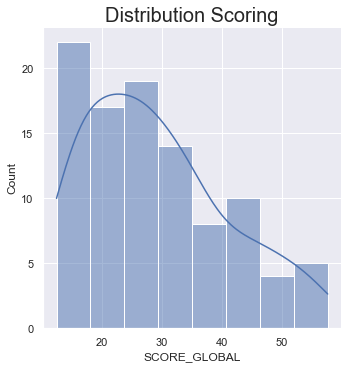

In [153]:
sns.displot(scoring['SCORE_GLOBAL'], kde=True)
plt.title("Distribution Scoring",fontsize = 20)
plt.savefig('Distribution.png')

In [154]:
analyseScoring = np.array([[scoring['SCORE_GLOBAL'].mean()], [scoring['SCORE_GLOBAL'].median()], [scoring['SCORE_GLOBAL'].std()]])
analyseScoringTab = pd.DataFrame(analyseScoring.T, index = ['Scoring Global'], columns = ['Moyenne', 'Médiane', 'Ecart-type'])
print(analyseScoringTab)

                  Moyenne    Médiane  Ecart-type
Scoring Global  29.046745  27.005325   11.738242


In [155]:
analyseScoringTab.to_excel("analyseScoringTab.xlsx")

<AxesSubplot:ylabel='Density'>

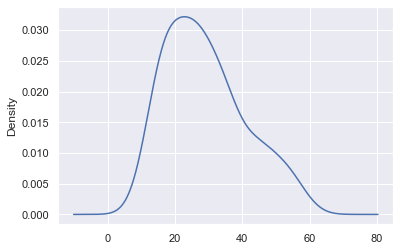

In [156]:
scoring['SCORE_GLOBAL'].plot.kde()

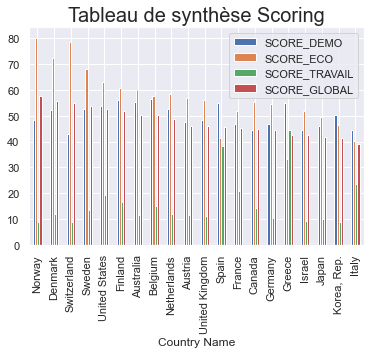

In [157]:
tabSynthèseScoring.plot.bar()
plt.title("Tableau de synthèse Scoring",fontsize = 20)
plt.savefig('Scoring.png')

In [158]:
tabSynthèseScoring.to_excel("tabSynthèseScoring.xlsx")

### Installation du package Folium

In [159]:
! pip install folium

In [160]:
import folium


CarteTop20 = folium.Map(location = [20, 0], zoom_start = 2)

*Coordonnées des capitales de pays dans le top 20 du scoring*

Norway 59.55 10.43
Denmark 55.43 12.34
Switzerland 46.37 7.25
Sweden 59.21 18.4
United States 38.53 -77.02
Finland 60.1 24.56
Australia -35.15 149.08
Belgium 50.51 4.21
Netherlands 52.38 4.9
Austria 48.12 16.21
United Kingdom 51.3 -0.7
Spain 40.26 -3.42
France 48.52 2.19
Canada 45.24 -75.4
Germany	52.31 13.25
Greece	38 23.42
Israel	31.47 35.13
Japan	35.41 139.46
Korea, Rep.	37.35 127.0
Italy 41.53 12.29

In [161]:
latlon = [ (59.55, 10.43), (55.43, 12.34), (46.37, 7.25), (59.21, 18.4), (38.53, -77.02), (60.1, 24.56), (-35.15, 149.08), (50.51, 4.21), (52.38, 4.9), (48.12, 16.21), (51.3, -0.7), (40.26, -3.42), (48.52, 2.19), (45.24, -75.4), (52.31, 13.25), (38, 23.42), (31.47, 35.13), (35.41, 139.46), (37.35, 127.0), (41.53, 12.29) ]

In [162]:
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to(CarteTop20)

In [163]:
CarteTop20

On remarque que notre Top 20 se situe essentiellement sur la zone Europe, Amérique du Nord, Asie de l'Est (Japon, Corée du Sud) + Australie

In [164]:
CarteTop20.save('CarteTop20.html')
CarteTop20.save('CarteTop20.png')

## Graphiques / Zones

In [165]:
zone = ['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin Aerica & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World']

In [166]:
statsDataSelection = statsDataSelection.reset_index()

In [167]:
statsDataSelection.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,"Adjusted net enrolment rate, primary, both sex...",77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN


In [168]:
statsDataSelectionZone = statsDataSelection[statsDataSelection['Country Name'].isin(zone)]
statsDataSelectionZone.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,"Adjusted net enrolment rate, primary, both sex...",77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN


In [169]:
ZoneGDPperCapita = statsDataSelectionZone.loc[statsDataSelectionZone['Indicator Name'] == 'GDP per capita (current US$)']
ZoneGDPperCapita.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1245,Arab World,GDP per capita (current US$),2615.682751,2515.077869,2499.335429,2754.304985,3168.186426,3796.021804,4414.093398,5046.817058,6255.761156,5267.552563,6032.961957,7005.479541,7571.402403,7715.998677,NaN,NaN,NaN
4910,East Asia & Pacific,GDP per capita (current US$),4055.709092,3738.690349,3766.856127,4108.866428,4572.447267,4842.264866,5099.524142,5664.143435,6495.933481,6648.004566,7679.834203,8844.822997,9402.722845,9447.701067,9665.056079,9541.871089,9787.775545
8575,East Asia & Pacific (excluding high income),GDP per capita (current US$),962.756290,1014.172747,1113.113996,1249.652524,1436.510057,1649.929142,1972.180482,2474.914586,3108.734621,3348.192994,4010.464900,4867.116671,5390.929190,5908.427878,6307.578998,6515.050151,6586.833593
12240,Euro area,GDP per capita (current US$),20190.188991,20442.338410,22133.456409,27161.563781,30983.833198,31989.210900,33802.487910,38718.446960,42235.248954,38491.672437,37617.721751,40614.907653,37598.889982,39107.504583,39820.585022,34348.255310,35008.049004
15905,Europe & Central Asia,GDP per capita (current US$),11626.213353,11721.093286,12799.364279,15550.032025,18071.333756,19191.592037,20709.685651,24108.847782,26352.539224,23084.226956,23536.905927,26015.889000,24970.975153,25976.554634,26192.934765,22442.214808,22230.203651


In [170]:
ZoneEtud = ['East Asia & Pacific', 'European Union', 'North America']

In [171]:
ZoneGDPperCapita = ZoneGDPperCapita[ZoneGDPperCapita['Country Name'].isin(ZoneEtud)]
ZoneGDPperCapita.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4910,East Asia & Pacific,GDP per capita (current US$),4055.709092,3738.690349,3766.856127,4108.866428,4572.447267,4842.264866,5099.524142,5664.143435,6495.933481,6648.004566,7679.834203,8844.822997,9402.722845,9447.701067,9665.056079,9541.871089,9787.775545
23235,European Union,GDP per capita (current US$),18051.195528,18217.452480,19816.237163,24073.268857,27693.344816,28838.506573,30658.982648,35320.425761,37872.038052,33773.404713,33558.684857,36180.169804,34119.019115,35438.487900,NaN,NaN,NaN
67215,North America,GDP per capita (current US$),35242.064196,35942.436273,36794.853607,38550.079900,40948.234184,43514.081923,45849.040821,47723.727469,48232.310008,46394.384846,48289.700300,50024.820295,51560.704640,52755.779252,54187.494095,55153.758209,56081.944482


In [172]:
ZoneGDPperCapita = ZoneGDPperCapita.drop(['Indicator Name'], axis=1)

In [173]:
ZoneGDPperCapita

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4910,East Asia & Pacific,4055.709092,3738.690349,3766.856127,4108.866428,4572.447267,4842.264866,5099.524142,5664.143435,6495.933481,6648.004566,7679.834203,8844.822997,9402.722845,9447.701067,9665.056079,9541.871089,9787.775545
23235,European Union,18051.195528,18217.452480,19816.237163,24073.268857,27693.344816,28838.506573,30658.982648,35320.425761,37872.038052,33773.404713,33558.684857,36180.169804,34119.019115,35438.487900,NaN,NaN,NaN
67215,North America,35242.064196,35942.436273,36794.853607,38550.079900,40948.234184,43514.081923,45849.040821,47723.727469,48232.310008,46394.384846,48289.700300,50024.820295,51560.704640,52755.779252,54187.494095,55153.758209,56081.944482


In [174]:
ZoneGDPperCapita.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000
mean,19116.322938,19299.526367,20125.982299,22244.071728,24404.675423,25731.617787,27202.515870,29569.432221,30866.760514,28938.598042,29842.739787,31683.271032,31694.148867,32547.322740,31926.275087,32347.814649,32934.860014
std,15620.437205,16129.118879,16516.177249,17293.315701,18409.534982,19522.216244,20593.473465,21611.515387,21732.158578,20309.485542,20558.367929,20955.061878,21183.339067,21798.314981,31482.117836,32252.474686,32734.920784
min,4055.709092,3738.690349,3766.856127,4108.866428,4572.447267,4842.264866,5099.524142,5664.143435,6495.933481,6648.004566,7679.834203,8844.822997,9402.722845,9447.701067,9665.056079,9541.871089,9787.775545
25%,11053.452310,10978.071414,11791.546645,14091.067643,16132.896042,16840.385719,17879.253395,20492.284598,22183.985766,20210.704639,20619.259530,22512.496400,21760.870980,22443.094484,20795.665583,20944.842869,21361.317780
50%,18051.195528,18217.452480,19816.237163,24073.268857,27693.344816,28838.506573,30658.982648,35320.425761,37872.038052,33773.404713,33558.684857,36180.169804,34119.019115,35438.487900,31926.275087,32347.814649,32934.860014
75%,26646.629862,27079.944376,28305.545385,31311.674378,34320.789500,36176.294248,38254.011735,41522.076615,43052.174030,40083.894779,40924.192578,43102.495050,42839.861877,44097.133576,43056.884591,43750.786429,44508.402248
max,35242.064196,35942.436273,36794.853607,38550.079900,40948.234184,43514.081923,45849.040821,47723.727469,48232.310008,46394.384846,48289.700300,50024.820295,51560.704640,52755.779252,54187.494095,55153.758209,56081.944482


In [175]:
ZoneGDPperCapita = ZoneGDPperCapita.set_index('Country Name')

In [176]:
ZoneGDPperCapitaT = ZoneGDPperCapita.transpose()
ZoneGDPperCapitaT

Country Name,East Asia & Pacific,European Union,North America
2000,4055.709092,18051.195528,35242.064196
2001,3738.690349,18217.452480,35942.436273
2002,3766.856127,19816.237163,36794.853607
2003,4108.866428,24073.268857,38550.079900
2004,4572.447267,27693.344816,40948.234184
2005,4842.264866,28838.506573,43514.081923
2006,5099.524142,30658.982648,45849.040821
2007,5664.143435,35320.425761,47723.727469
2008,6495.933481,37872.038052,48232.310008
2009,6648.004566,33773.404713,46394.384846


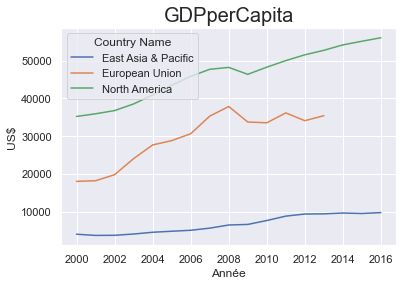

In [177]:
ZoneGDPperCapitaT.plot()
plt.title("GDPperCapita",fontsize = 20)
plt.xlabel('Année')
plt.ylabel('US$')
plt.savefig('GDPperCapita.png')

In [178]:
ZonePopTot = statsDataSelectionZone.loc[statsDataSelectionZone['Indicator Name'] == 'Population, total']
ZonePopTot.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2533,Arab World,"Population, total",2.775614e+08,2.834931e+08,2.896810e+08,2.960959e+08,3.028247e+08,3.098244e+08,3.171258e+08,3.246935e+08,3.324249e+08,3.401490e+08,3.477370e+08,3.551370e+08,3.624666e+08,3.697615e+08,NaN,NaN,NaN
6198,East Asia & Pacific,"Population, total",2.044496e+09,2.063002e+09,2.080535e+09,2.097265e+09,2.113465e+09,2.129445e+09,2.145245e+09,2.160432e+09,2.175832e+09,2.190811e+09,2.205615e+09,2.220358e+09,2.235430e+09,2.250552e+09,2.265898e+09,2.281203e+09,2.296786e+09
9863,East Asia & Pacific (excluding high income),"Population, total",1.813302e+09,1.830514e+09,1.846954e+09,1.862792e+09,1.878256e+09,1.893574e+09,1.908392e+09,1.922658e+09,1.936775e+09,1.950768e+09,1.964692e+09,1.978728e+09,1.993009e+09,2.007435e+09,2.022021e+09,2.036553e+09,2.051431e+09
13528,Euro area,"Population, total",3.213108e+08,3.225479e+08,3.241253e+08,3.258860e+08,3.276825e+08,3.293804e+08,3.309228e+08,3.326452e+08,3.342747e+08,3.353609e+08,3.361515e+08,3.354258e+08,3.361673e+08,3.372969e+08,3.384296e+08,3.395192e+08,3.408946e+08
17193,Europe & Central Asia,"Population, total",8.623041e+08,8.636156e+08,8.651969e+08,8.674577e+08,8.700308e+08,8.726616e+08,8.753432e+08,8.784660e+08,8.819658e+08,8.855917e+08,8.890162e+08,8.910950e+08,8.946667e+08,8.988551e+08,9.030947e+08,9.074248e+08,9.119953e+08


In [179]:
ZonePopTot = ZonePopTot[ZonePopTot['Country Name'].isin(ZoneEtud)]
ZonePopTot.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
6198,East Asia & Pacific,"Population, total",2.044496e+09,2.063002e+09,2.080535e+09,2.097265e+09,2.113465e+09,2.129445e+09,2.145245e+09,2.160432e+09,2.175832e+09,2.190811e+09,2.205615e+09,2.220358e+09,2.235430e+09,2.250552e+09,2.265898e+09,2.281203e+09,2.296786e+09
24523,European Union,"Population, total",4.879757e+08,4.891615e+08,4.905041e+08,4.923408e+08,4.943301e+08,4.963034e+08,4.981792e+08,5.000322e+08,5.019241e+08,5.034083e+08,5.046319e+08,5.060310e+08,5.056403e+08,5.067393e+08,NaN,NaN,NaN
68503,North America,"Population, total",3.129939e+08,3.161134e+08,3.190501e+08,3.218473e+08,3.248640e+08,3.278928e+08,3.310149e+08,3.341840e+08,3.374050e+08,3.404657e+08,3.434186e+08,3.460707e+08,3.488137e+08,3.514254e+08,3.541732e+08,3.568105e+08,3.594793e+08


In [180]:
ZonePopTot = ZonePopTot.drop(['Indicator Name'], axis=1)

In [181]:
ZonePopTot = ZonePopTot.set_index('Country Name')

In [182]:
ZonePopTotT = ZonePopTot.transpose()
ZonePopTotT

Country Name,East Asia & Pacific,European Union,North America
2000,2.044496e+09,487975692.0,312993944.0
2001,2.063002e+09,489161520.0,316113359.0
2002,2.080535e+09,490504132.0,319050105.0
2003,2.097265e+09,492340768.0,321847258.0
2004,2.113465e+09,494330068.0,324864038.0
2005,2.129445e+09,496303356.0,327892753.0
2006,2.145245e+09,498179240.0,331014940.0
2007,2.160432e+09,500032205.0,334184023.0
2008,2.175832e+09,501924141.0,337405012.0
2009,2.190811e+09,503408338.0,340465736.0


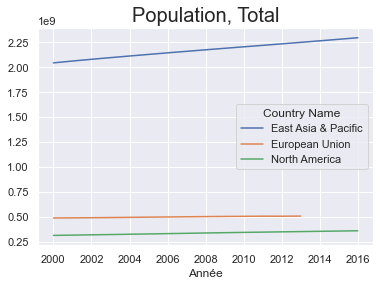

In [183]:
ZonePopTotT.plot()
plt.title("Population, Total",fontsize = 20)
plt.xlabel('Année')
plt.savefig('PopTot.png')